# Problem 1

In [1]:
# Probabilities of each weather condition given that the intruder was detected
P_clear_given_detected = 0.60
P_cloudy_given_detected = 0.20
P_rain_given_detected = 0.15
P_snow_given_detected = 0.05

# Probabilities of each weather condition given that the intruder was not detected
P_clear_given_not_detected = 0.40
P_cloudy_given_not_detected = 0.30
P_rain_given_not_detected = 0.20
P_snow_given_not_detected = 0.10

# Probability of detecting an intruder
P_detected = 0.98

# Probability of not detecting an intruder
P_not_detected = 1 - P_detected

# Probabilities of each weather condition
P_clear = P_clear_given_detected * P_detected + P_clear_given_not_detected * P_not_detected
P_cloudy = P_cloudy_given_detected * P_detected + P_cloudy_given_not_detected * P_not_detected
P_rain = P_rain_given_detected * P_detected + P_rain_given_not_detected * P_not_detected
P_snow = P_snow_given_detected * P_detected + P_snow_given_not_detected * P_not_detected

# Probabilities of not detecting an intruder given each weather condition
P_not_detected_given_clear = (P_clear_given_not_detected * P_not_detected) / P_clear
P_not_detected_given_cloudy = (P_cloudy_given_not_detected * P_not_detected) / P_cloudy
P_not_detected_given_rain = (P_rain_given_not_detected * P_not_detected) / P_rain
P_not_detected_given_snow = (P_snow_given_not_detected * P_not_detected) / P_snow

# Print the probabilities
print("Probability of not detecting an intruder given clear weather:", P_not_detected_given_clear)
print("Probability of not detecting an intruder given cloudy weather:", P_not_detected_given_cloudy)
print("Probability of not detecting an intruder given rain:", P_not_detected_given_rain)
print("Probability of not detecting an intruder given snow:", P_not_detected_given_snow)

Probability of not detecting an intruder given clear weather: 0.01342281879194632
Probability of not detecting an intruder given cloudy weather: 0.029702970297029726
Probability of not detecting an intruder given rain: 0.026490066225165587
Probability of not detecting an intruder given snow: 0.03921568627450984


### Based on the calculated probabilities, the weather condition that has the most adverse effects on the intruder detection system is when it's snowing. This is because the probability of not detecting an intruder given snow weather is the highest among all weather conditions, at approximately 0.0392 or 3.92%. This suggests that the system's performance is most negatively affected during snow conditions.

### Justification

Bayes' theorem is a fundamental concept in probability theory and statistics that describes how to update the probabilities of hypotheses when given evidence. It's used in a wide range of applications, from medical diagnostics to machine learning algorithms.

This approach is systematic and based on sound mathematical principles. It allows us to incorporate both our prior knowledge (the overall probabilities of detecting or not detecting an intruder) and the observed data (the probabilities of each weather condition given that the intruder was detected or not detected) to make inferences about the conditional probabilities of interest.

If we get new data that allows us to update the probabilities of each weather condition given that the intruder was detected or not detected, we can easily incorporate this new data into our calculations.

# Problem 2

### Part a

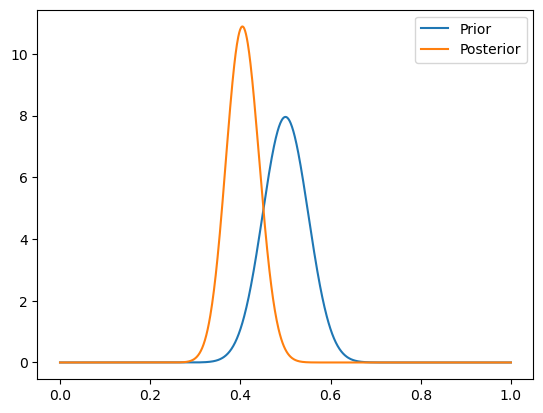

In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Prior parameters (Beta distribution)
a_prior = 50  # corresponds to prior mean of 0.5 (a_prior/(a_prior+b_prior))
b_prior = 50  # corresponds to prior std deviation of 0.05

# Data
heads = 23
tails = 80 - heads

# Posterior parameters
a_post = a_prior + heads
b_post = b_prior + tails

# Plotting
x = np.linspace(0, 1, 1000)
y_prior = beta.pdf(x, a_prior, b_prior)
y_post = beta.pdf(x, a_post, b_post)

plt.plot(x, y_prior, label='Prior')
plt.plot(x, y_post, label='Posterior')
plt.legend()
plt.show()

In [1]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

# Prior parameters (Normal distribution)
mu = 0.5
sigma = 0.05

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Likelihood function (Binomial distribution)
def likelihood(p):
    return binom.pmf(k, n, p)

# Prior function (Normal distribution)
def prior(p):
    return norm.pdf(p, mu, sigma)

# Posterior function (product of likelihood and prior)
def posterior(p):
    return likelihood(p) * prior(p)

# Calculate the normalization constant
normalization_constant, error = quad(posterior, 0, 1)


print("Normalization constant:", normalization_constant)

5.650541216527591e-05
Normalization constant: 0.0011142697343261361


### From Analytical

In [10]:
from scipy.integrate import quad
from scipy.special import comb
import numpy as np

# Define the function to integrate
def f(p):
    return (comb(80, 23) * (p**23) * ((1-p)**(80-23)) * (1/np.sqrt(2*np.pi*(0.05**2))) * np.exp(-((p-0.5)**2)/(2*(0.05**2))))

# Calculate the integral from 0 to 1
k, error = quad(f, 0, 1)

print(k)

0.001114269734326134


### Part b

In [4]:
from scipy.stats import binom

# Prior distribution
prior = {0.25: 0.5, 0.75: 0.5}

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Calculate the likelihood of the data given each possible value of p
likelihood = {p: binom.pmf(k, n, p) for p in prior.keys()}

# Calculate the unnormalized posterior distribution
posterior_unnormalized = {p: likelihood[p] * prior[p] for p in prior.keys()}

# Normalize the posterior distribution so that the total probability sums to 1
total_probability = sum(posterior_unnormalized.values())
posterior = {p: posterior_unnormalized[p] / total_probability for p in prior.keys()}

# Print the posterior distribution
for p, prob in posterior.items():
    print(f"Probability of p = {p}: {prob}")

Probability of p = 0.25: 1.0
Probability of p = 0.75: 5.996216974838106e-17


### Analytical

In [14]:
from scipy.integrate import quad
from scipy.special import comb
import numpy as np

# Define the function to integrate
def f(p):
    return (comb(80, 23) * (p**23) * ((1-p)**(80-23)) * 0.5 )

# Calculate the integral from 0 to 1
k, error = quad(f, 0, 1)

print(k)

0.006172839506172841


### Part c

Mean of the posterior distribution: 0.2926829268292683
Variance of the posterior distribution: 0.0024942124237580902
Mode of the posterior distribution: 0.2875


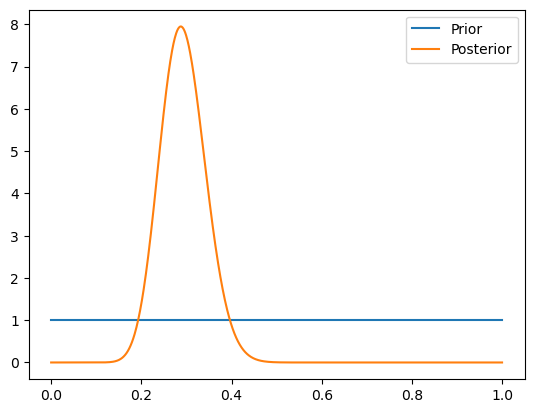

In [6]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Prior parameters (Uniform distribution is equivalent to Beta(1, 1))
a_prior = 1
b_prior = 1

# Data
heads = 23
tails = 80 - heads

# Posterior parameters
a_post = a_prior + heads
b_post = b_prior + tails

# Mean of the posterior distribution
mean_post = a_post / (a_post + b_post)

# Variance of the posterior distribution
var_post = a_post * b_post / ((a_post + b_post)**2 * (a_post + b_post + 1))

# Mode of the posterior distribution
mode_post = (a_post - 1) / (a_post + b_post - 2)  # only valid if a_post, b_post > 1

print("Mean of the posterior distribution:", mean_post)
print("Variance of the posterior distribution:", var_post)
print("Mode of the posterior distribution:", mode_post)

# Plotting
x = np.linspace(0, 1, 1000)
y_prior = beta.pdf(x, a_prior, b_prior)
y_post = beta.pdf(x, a_post, b_post)

plt.plot(x, y_prior, label='Prior')
plt.plot(x, y_post, label='Posterior')
plt.legend()
plt.show()

### Analytical

In [15]:
from scipy.integrate import quad
from scipy.special import comb
import numpy as np

# Define the function to integrate
def f(p):
    return (comb(80, 23) * (p**23) * ((1-p)**(80-23)) * 1 )

# Calculate the integral from 0 to 1
k, error = quad(f, 0, 1)

print(k)

0.012345679012345682


### Part d

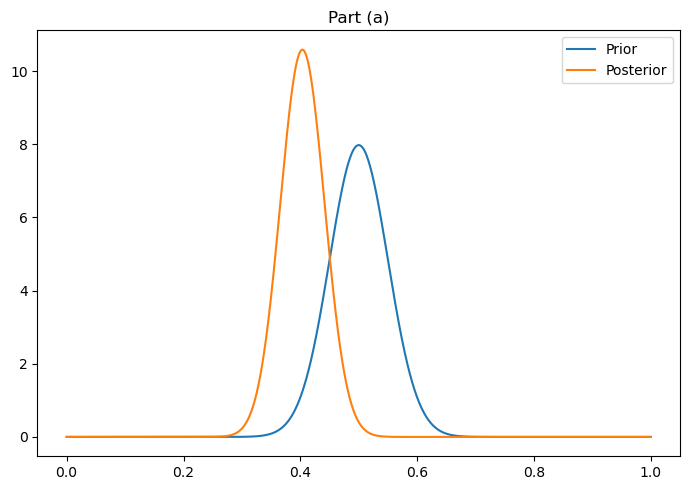

In [7]:
from scipy.stats import norm, binom, beta
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Prior and likelihood for part (a)
mu = 0.5
sigma = 0.05
prior_a = lambda p: norm.pdf(p, mu, sigma)
likelihood = lambda p: binom.pmf(k, n, p)

# Posterior for part (a)
posterior_a_unnormalized = lambda p: likelihood(p) * prior_a(p)
normalization_constant_a, _ = quad(posterior_a_unnormalized, 0, 1)  # numerical integration
posterior_a = lambda p: posterior_a_unnormalized(p) / normalization_constant_a

# Plotting
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(7, 5))

# Part (a)
plt.plot(x, prior_a(x), label='Prior')
plt.plot(x, posterior_a(x), label='Posterior')
plt.title('Part (a)')
plt.legend()

plt.tight_layout()
plt.show()

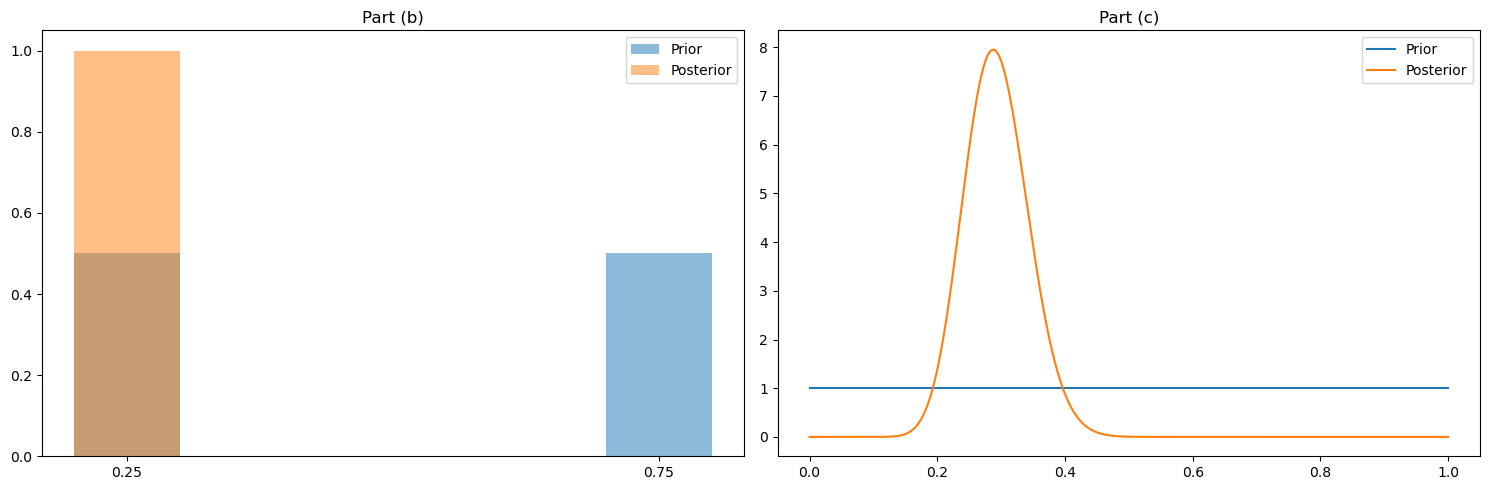

In [7]:
from scipy.stats import binom, beta
import matplotlib.pyplot as plt
import numpy as np

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Likelihood
likelihood = lambda p: binom.pmf(k, n, p)

# Prior and likelihood for part (b)
prior_b = {0.25: 0.5, 0.75: 0.5}

# Posterior for part (b)
posterior_b_unnormalized = {p: likelihood(p) * prior_b[p] for p in prior_b.keys()}
total_probability_b = sum(posterior_b_unnormalized.values())
posterior_b = {p: posterior_b_unnormalized[p] / total_probability_b for p in prior_b.keys()}

# Prior and likelihood for part (c)
a_prior = 1
b_prior = 1

# Posterior for part (c)
a_post = a_prior + k
b_post = b_prior + (n - k)

# Plotting
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 5))

# Part (b)
plt.subplot(1, 2, 1)
plt.bar(prior_b.keys(), prior_b.values(), width=0.1, label='Prior', alpha=0.5)
plt.bar(posterior_b.keys(), posterior_b.values(), width=0.1, label='Posterior', alpha=0.5)
plt.xticks(list(prior_b.keys()))
plt.title('Part (b)')
plt.legend()

# Part (c)
plt.subplot(1, 2, 2)
plt.plot(x, beta.pdf(x, a_prior, b_prior), label='Prior')
plt.plot(x, beta.pdf(x, a_post, b_post), label='Posterior')
plt.title('Part (c)')
plt.legend()

plt.tight_layout()
plt.show()

### Justification 

The code is divided into several parts, each demonstrating a different prior distribution (Beta, Normal, Discrete, and Uniform) and how the posterior distribution is updated based on the observed data (number of heads and tails from coin tosses).

Beta Prior: The Beta distribution is a suitable choice for the prior when the parameter of interest is a probability. The code calculates the posterior parameters and plots the prior and posterior distributions.

Normal Prior: The Normal distribution is used as the prior. The likelihood function is defined as a Binomial distribution. The posterior is calculated as the product of the likelihood and the prior, and a normalization constant is calculated to ensure the total probability sums to 1.

Discrete Prior: A discrete prior is used with only two possible values for the parameter. The likelihood of the data given each possible value of the parameter is calculated, and the posterior distribution is calculated and normalized.

Uniform Prior: A Uniform distribution (equivalent to Beta(1, 1)) is used as the prior. The posterior parameters are calculated and the prior and posterior distributions are plotted.

Comparison of Different Priors: The code compares the results of using different priors (Normal, Discrete, and Uniform) and plots the prior and posterior distributions for each case.

The reason this approach is considered the best way to solve the problem is because it allows us to use the information we have (the prior distribution and the observed data) to calculate the information we want (the posterior distribution). This approach is systematic and based on sound mathematical principles. It allows us to incorporate both our prior knowledge (the prior distribution) and the observed data to make inferences about the parameter of interest.

# Problem 3

### Part a

The Beta distribution is a conjugate prior for the Binomial distribution. This means that if the prior distribution is a Beta distribution and the likelihood function is a Binomial distribution, then the posterior distribution is also a Beta distribution.

The Beta distribution is defined as:

Beta(R|α, β) = Γ(α + β) / (Γ(α)Γ(β)) * R^(α-1) * (1 - R)^(β-1)

The Binomial likelihood function is defined as:

L(R|n, k) = C(n, k) * R^k * (1 - R)^(n-k)

where n is the number of trials, k is the number of successes, and C(n, k) is the binomial coefficient.

The posterior distribution is proportional to the product of the prior and the likelihood:

Posterior ∝ Prior * Likelihood

Substituting the Beta prior and Binomial likelihood, we get:

Posterior ∝ R^(α-1) * (1 - R)^(β-1) * R^k * (1 - R)^(n-k)

Simplifying, we get:

Posterior ∝ R^(α+k-1) * (1 - R)^(β+n-k-1)

This is the form of a Beta distribution with parameters α' = α + k and β' = β + n - k. Therefore, the posterior distribution is a Beta distribution.

### Part b

Mean = α / (α + β) Mode = (α - 1) / (α + β - 2) (for α, β > 1) Variance = αβ / [(α + β)^2 * (α + β + 1)]

Given the prior parameters α = 20, β = 2, and the observed data n = 50, k = 49 (one failure means 49 successes), the posterior parameters are α' = α + k = 69 and β' = β + n - k = 3.

We can calculate the mean, mode, and variance of the prior and posterior distributions and discuss the difference.

In [23]:
from scipy.stats import beta

# Prior parameters
alpha_prior = 20
beta_prior = 2

# Data
n = 50
k = 49

# Posterior parameters
alpha_post = alpha_prior + k
beta_post = beta_prior + n - k

# Statistics
mean_prior = beta.mean(alpha_prior, beta_prior)
mode_prior = (alpha_prior - 1) / (alpha_prior + beta_prior - 2)
var_prior = beta.var(alpha_prior, beta_prior)

mean_post = beta.mean(alpha_post, beta_post)
mode_post = (alpha_post - 1) / (alpha_post + beta_post - 2)
var_post = beta.var(alpha_post, beta_post)

print(f"Prior: mean = {mean_prior}, mode = {mode_prior}, variance = {var_prior}")
print(f"Posterior: mean = {mean_post}, mode = {mode_post}, variance = {var_post}")

Prior: mean = 0.9090909090909091, mode = 0.95, variance = 0.0035932446999640674
Posterior: mean = 0.9583333333333334, mode = 0.9714285714285714, variance = 0.0005469939117199391


### Analytical

In [24]:
from scipy.stats import beta

# Prior parameters
alpha_prior = 20
beta_prior = 2

# Posterior parameters
alpha_post = 69
beta_post = 3

# Statistics
mean_prior = alpha_prior / (alpha_prior + beta_prior)
mode_prior = (alpha_prior - 1) / (alpha_prior + beta_prior - 2)
var_prior = alpha_prior * beta_prior / (((alpha_prior + beta_prior)**2) * (alpha_prior + beta_prior + 1))

mean_post = alpha_post / (alpha_post + beta_post)
mode_post = (alpha_post - 1) / (alpha_post + beta_post - 2)
var_post = alpha_post * beta_post / (((alpha_post + beta_post)**2) * (alpha_post + beta_post + 1))

print(f"Prior: mean = {mean_prior}, mode = {mode_prior}, variance = {var_prior}")
print(f"Posterior: mean = {mean_post}, mode = {mode_post}, variance = {var_post}")

Prior: mean = 0.9090909090909091, mode = 0.95, variance = 0.0035932446999640674
Posterior: mean = 0.9583333333333334, mode = 0.9714285714285714, variance = 0.0005469939117199391


### Justification

The code is using Bayesian inference with a Beta prior and a Binomial likelihood to update the probability distribution of a parameter (probability of success in a trial) based on observed data.

The Beta distribution is a conjugate prior for the Binomial distribution. This means that if the prior distribution is a Beta distribution and the likelihood function is a Binomial distribution, then the posterior distribution is also a Beta distribution. This property simplifies the calculation of the posterior distribution and makes the Beta-Binomial model a popular choice for problems where the parameter of interest is a probability.

The code first defines the parameters of the prior distribution (alpha_prior and beta_prior) and the observed data (n and k). It then calculates the parameters of the posterior distribution (alpha_post and beta_post) based on the formula for the Beta-Binomial model.

The code then calculates the mean, mode, and variance of the prior and posterior distributions using the formulas for these statistics for a Beta distribution. The mean, mode, and variance provide a summary of the distribution and can be used to understand how the distribution has been updated based on the observed data.

The code then prints the mean, mode, and variance of the prior and posterior distributions. This allows us to see how the prior beliefs have been updated based on the observed data.

This approach is appropriate for this problem because it allows us to systematically update our beliefs about the parameter of interest based on the observed data. The Beta-Binomial model is a mathematically sound model that is widely used in statistics and machine learning for problems involving probabilities. The use of a conjugate prior simplifies the calculation of the posterior distribution and allows us to easily calculate summary statistics of the distribution.